# Qutip Practice
# Two level (Numerics + Analytics)

Perplexity link guidance: https://www.perplexity.ai/search/two-level-atom-libladian-full-VIGrhuYhR2GHqjnifvoSUA 


also helpful: https://en.wikipedia.org/wiki/Maxwell%E2%80%93Bloch_equations

# Two-Level Atom Coupled to Light: Lindblad Equation Solution

## System Definition
# In this hamiltonian we consider excited state is delta /2 up and gs is -delta/2, if u want different convetion add a constant delta/2 to get gs zero energy and excited at delta 
The Hamiltonian in the rotating wave approximation (RWA):

$$H = \frac{\hbar\Delta}{2}\sigma_z + \hbar g(\sigma_+ + \sigma_-)$$

Where:
- $\Delta = \omega_0 - \omega_L$ is the detuning
- $g$ is the coupling strength
- $\sigma_z, \sigma_+, \sigma_-$ are Pauli matrices

Lindblad operator for spontaneous emission:

$$L = \sqrt{\gamma}\sigma_-$$

## Lindblad Equation

$$\frac{d\rho}{dt} = -\frac{i}{\hbar}[H, \rho] + \gamma\left(\sigma_-\rho\sigma_+ - \frac{1}{2}\{\sigma_+\sigma_-, \rho\}\right)$$

## Expanded Equations

Density matrix:

$$\rho = \begin{pmatrix}
\rho_{ee} & \rho_{eg} \\
\rho_{ge} & \rho_{gg}
\end{pmatrix}$$

Coupled differential equations:

$$\frac{d\rho_{ee}}{dt} = -\gamma\rho_{ee} + ig(\rho_{eg} - \rho_{ge})$$
$$\frac{d\rho_{gg}}{dt} = \gamma\rho_{ee} - ig(\rho_{eg} - \rho_{ge})$$
$$\frac{d\rho_{eg}}{dt} = -\left(\frac{\gamma}{2} + i\Delta\right)\rho_{eg} + ig(\rho_{ee} - \rho_{gg})$$
$$\frac{d\rho_{ge}}{dt} = -\left(\frac{\gamma}{2} - i\Delta\right)\rho_{ge} - ig(\rho_{ee} - \rho_{gg})$$

## Steady-State Solution

Setting time derivatives to zero:

$$0 = -\gamma\rho_{ee} + ig(\rho_{eg} - \rho_{ge})$$
$$0 = \gamma\rho_{ee} - ig(\rho_{eg} - \rho_{ge})$$
$$0 = -\left(\frac{\gamma}{2} + i\Delta\right)\rho_{eg} + ig(\rho_{ee} - \rho_{gg})$$
$$0 = -\left(\frac{\gamma}{2} - i\Delta\right)\rho_{ge} - ig(\rho_{ee} - \rho_{gg})$$

## Solution

Steady-state populations:

$$\rho_{ee} = \frac{g^2}{2g^2 + \frac{\gamma^2}{4} + \Delta^2}$$
$$\rho_{gg} = 1 - \rho_{ee}$$
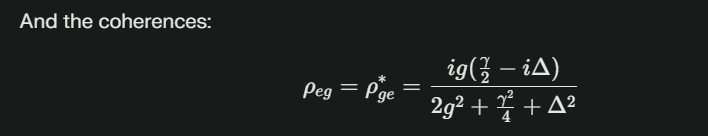

# The coherence term can be further simplified and can be written as: ![WhatsApp Image 2024-11-01 at 18.43.00_0f723c06.jpg](<attachment:WhatsApp Image 2024-11-01 at 18.43.00_0f723c06.jpg>)
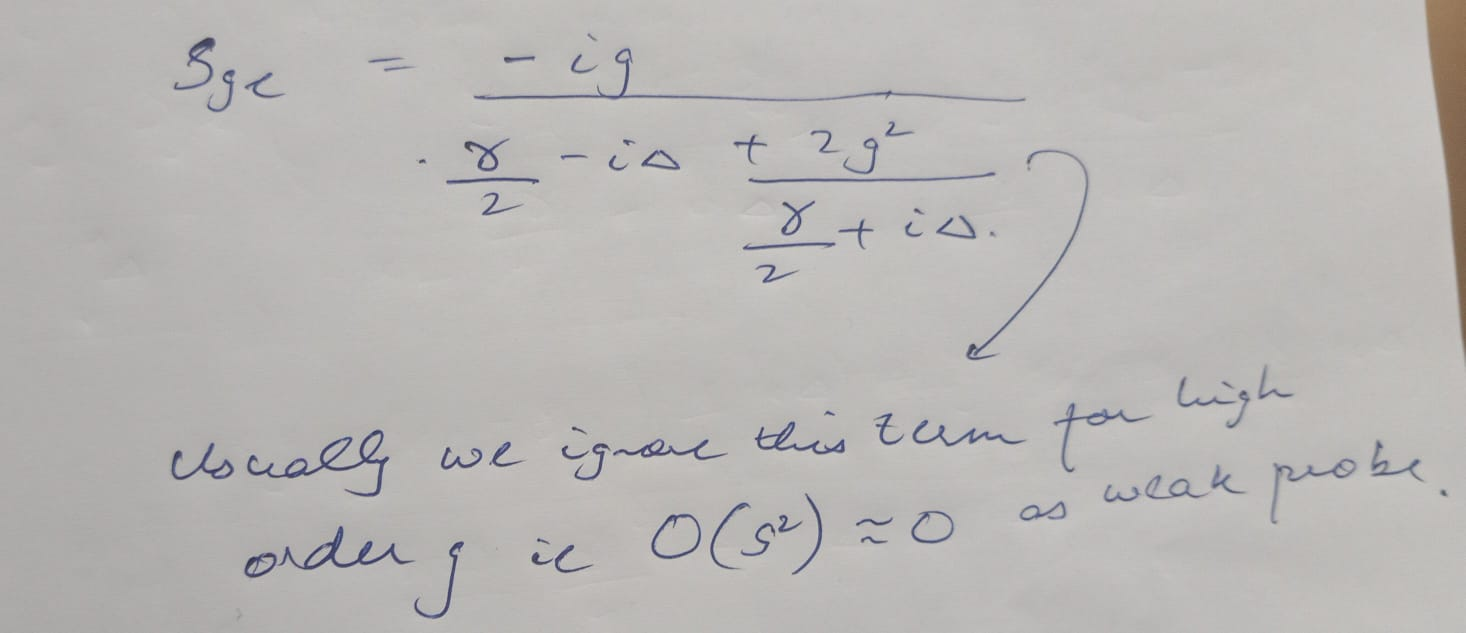

In [503]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider
import ipywidgets as widgets

def create_hamiltonian(Δ, g):
    """Create the Hamiltonian for the system."""
    return 0.5 * Δ * qt.sigmaz() + g * (qt.sigmap() + qt.sigmam())   # two level system

def calculate_coherence(Δ, g, γ):
    """Calculate coherence using QuTiP and analytical methods."""
    # QuTiP calculation
    H = create_hamiltonian(Δ, g)
    c_ops = [np.sqrt(γ) * qt.sigmam()]
    rho_ss = qt.steadystate(H, c_ops)
    rho_eg_qutip = rho_ss[0, 1]
    
    # Analytical calculation
    rho_eg_analytical = -1j * g * ((γ / 2) - 1j * Δ) / (2 * g**2 + (γ**2) / 4 + Δ**2) 
    
    # return np.real(1j*rho_eg_qutip), np.imag(rho_eg_analytical)
    return rho_eg_qutip,rho_eg_analytical

def plot_coherences(g, γ,OD):
    # System parameters
    Δ_values = np.linspace(-5, 5, 100)

    # Arrays to store coherence values
    coherence_qutip = []
    coherence_analytical = []

    # Calculate coherences for each Δ
    for Δ in Δ_values:
        qutip_result, analytical_result = calculate_coherence(Δ, g, γ)
        coherence_qutip.append(qutip_result)
        coherence_analytical.append(analytical_result)

    # Convert lists to numpy arrays for plotting
    coherence_qutip = np.array(coherence_qutip)
    coherence_analytical = np.array(coherence_analytical)

    χ_analytical = OD*coherence_analytical/g
    χ_numerical = OD*coherence_qutip/g
    transmission_analytical = np.exp(-np.real(1j*χ_analytical))
    transmission_numerical = np.exp(-np.real(1j*χ_numerical))

    phase_analytical = np.real(χ_analytical)
    phase_numerical =  np.imag(1j*χ_numerical)


    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot on each subplot
    axes[0].plot(Δ_values, transmission_analytical,label='Analytical transmission', color='blue')
    axes[0].plot(Δ_values, transmission_numerical,'--' ,label='QuTiP transmission', color='red')
    axes[0].set_title("Transmission")
    axes[0].set_xlabel("Detuning Δ")
    axes[0].set_ylabel("Transmission")
    axes[0].legend()


    axes[1].plot(Δ_values, phase_analytical, label='Analytical Phase', color='blue')
    axes[1].plot(Δ_values, phase_numerical,'--', label='QuTiP Phase', color='red')
    axes[1].set_title("Phase")
    axes[1].set_xlabel("Detuning Δ")
    axes[1].set_ylabel("Phase")
    axes[1].legend()


    
    axes[2].plot(Δ_values, abs(coherence_analytical), label='Analytical coherence rho_12', color='blue')
    axes[2].plot(Δ_values, abs(coherence_qutip),'--', label='QuTiP coherence rho_12', color='red')
    axes[2].set_title(r"coherence $\rho_{12}$")
    axes[2].set_xlabel("Detuning Δ")
    axes[2].set_ylabel("coherence rho_12")
    axes[2].legend()


    plt.suptitle("Always consider weak probe limit that is very low g", fontsize=16)
    plt.tight_layout()
    plt.show()


# Create sliders
g_slider = FloatSlider(value=0.1, min=0.001, max=.5, step=0.1, description='g:')
γ_slider = FloatSlider(value=0.1, min=0.05, max=1.0, step=0.01, description='γ:')
OD = FloatSlider(value=50, min=0, max=150, step=5, description='OD:')
# Create interactive plot
interactive_plot = interactive(plot_coherences, g=g_slider, γ=γ_slider,OD=OD)

# Display the interactive plot
display(interactive_plot)

interactive(children=(FloatSlider(value=0.1, description='g:', max=0.5, min=0.001), FloatSlider(value=0.1, des…


# Three level (Numerics + Analytics)
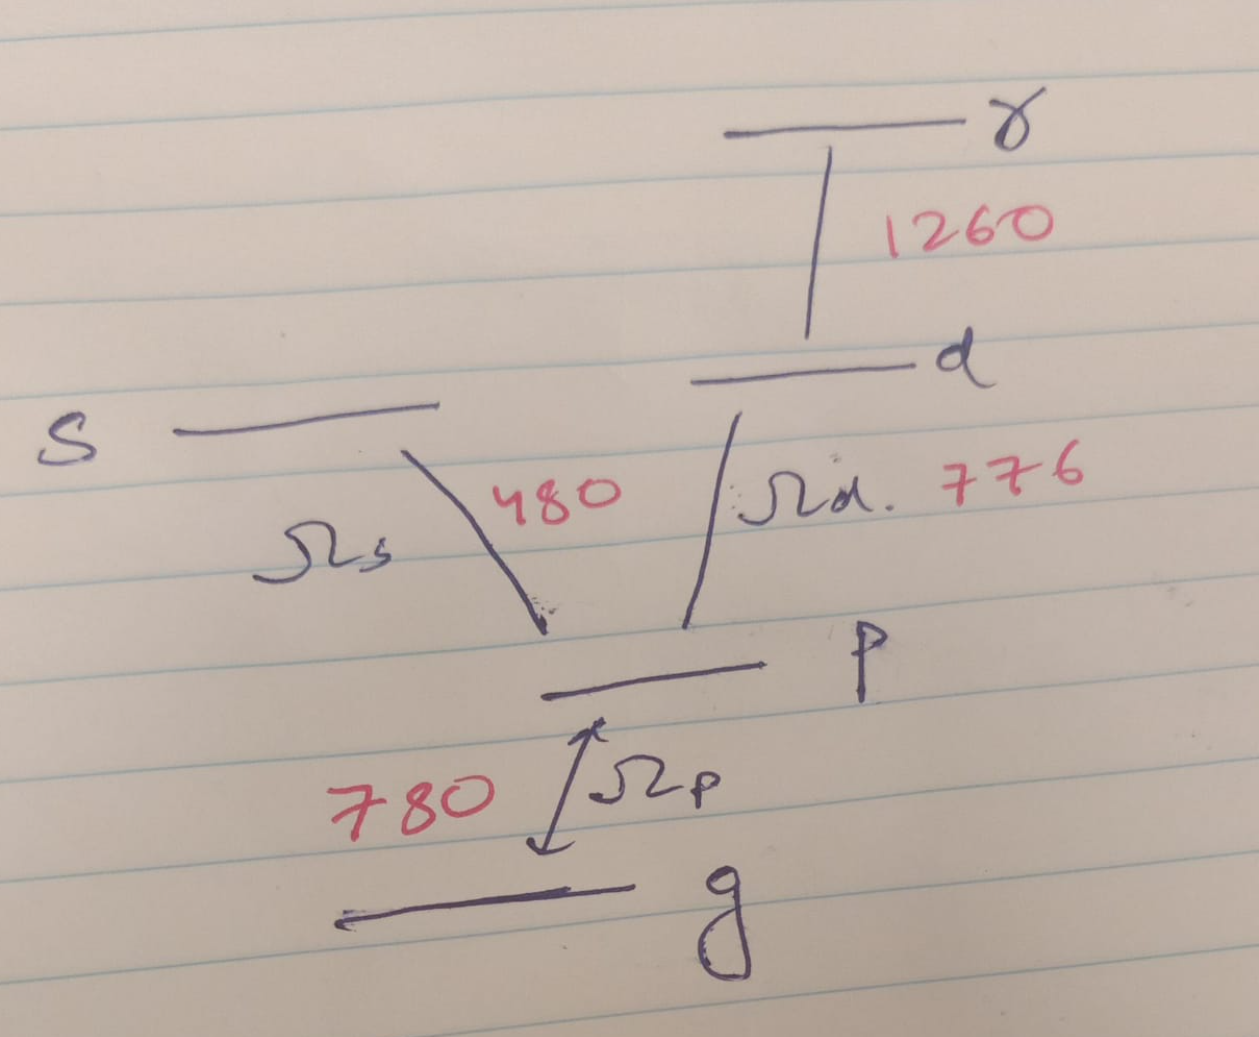

In [606]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Layout
from IPython.display import display

# Fixed parameter
g_1 = 0.001  # Weak probe coupling strength for transition 1-3

def analytical_coherence(Δ_1, g_2, γ_31, γ_21, Δ_2):
    nr = 1j * g_1 * (γ_21/2 - 1j*(Δ_2+Δ_1))
    dr = (γ_31/2-1j*Δ_1)*(γ_21/2-1j*(Δ_1+Δ_2)) + g_2**2
    return nr/dr



def numerical_coherence(Δ_1, g_2, γ_31, γ_23, γ_21, Δ_2):
    # Define basis states and operators
    g = qt.basis(3, 0)  # Ground state |1⟩
    e_1 = qt.basis(3, 2)  # Highly excited state |2⟩
    e_2 = qt.basis(3, 1)  # Middle state |3⟩

    a_13 = g * e_2.dag()  # Lowering operator for 1-3 transition
    a_32 = e_2 * e_1.dag()  # Lowering operator for 3-2 transition
    a_12 = g * e_1.dag()  # Lowering operator for 2-1 transition

    H = Δ_1 * e_2 * e_2.dag() + (Δ_1 + Δ_2) * e_1 * e_1.dag() + \
        g_1 * (a_13 + a_13.dag()) + g_2 * (a_32 + a_32.dag())
    c_ops = [np.sqrt(γ_31) * a_13, np.sqrt(γ_23) * a_32, np.sqrt(γ_21)*a_12]

    rho0 = qt.basis(3,0) * qt.basis(3,0).dag()
    ρ_ss = qt.steadystate(H, c_ops, rho0=rho0)


    # trick to somehow use the approximation
        # ρ_ss = qt.steadystate(H, c_ops,rho0=rho0)

        # ss_approx = ρ_ss.full()
        # ss_approx[2,2] = 0  # ρ22 = 0
        # ss_approx[1,1] = 0  # ρ33 = 0
        # ss_approx[1,2] = 0  # ρ23 = 0
        # ss_approx[2,1] = 0  # ρ32 = 0
        # ss_approx = qt.Qobj(ss_approx)
        # ss_approx = ss_approx / ss_approx.tr()
        # ρ_13_numerical.append(np.abs(ss_approx[0,1]))  



    return ρ_ss[0,1]




def plot_coherences(g_2, γ_31, γ_23, γ_21, Δ_2,OD):
    # System parameters
    Δ_1_range = np.linspace(-12, 12, 200)
    
    # Calculate coherences
    ρ_13_analytical = [analytical_coherence(Δ_1, g_2, γ_31, γ_21, Δ_2) for Δ_1 in Δ_1_range]
    ρ_13_numerical = [numerical_coherence(Δ_1, g_2, γ_31, γ_23, γ_21, Δ_2) for Δ_1 in Δ_1_range]



    # Create figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    # fig.suptitle(f'Three-Level Ladder System Analysis (Weak Probe Limit) g₁ (weak probe, fixed) = {g_1}', fontsize=16)

    # Add fixed g_1 value on top of the figure
    fig.text(0.5, 0.95, f'g₁ (fixed) = {g_1:.9f}', horizontalalignment='center', fontsize=12)

    # Plot 1: Coherences
    ax1.plot(Δ_1_range, np.abs(ρ_13_analytical), 'b-', label='|ρ₁₃| Analytical')
    ax1.plot(Δ_1_range, np.abs(ρ_13_numerical), 'r--', label='|ρ₁₃| Numerical')
    ax1.set_xlabel('Probe Detuning (Δ₁)')
    ax1.set_ylabel('Coherence Magnitude')
    ax1.set_title('Coherences vs Probe Detuning')
    ax1.legend()
    ax1.grid(True)

    # Plot 2: Transmission


    ax2.plot(Δ_1_range, np.exp(-OD*np.imag(ρ_13_analytical)), 'b-', label = 'analytical tranmission')
    ax2.plot(Δ_1_range, np.exp(-OD*np.imag(ρ_13_numerical)), 'r--', label = 'numerical tranmission')
    ax2.set_xlabel('Probe Detuning (Δ₁)')
    ax2.set_ylabel('Transmission')
    ax2.legend()
    ax2.grid(True)

    # Plot 3: Ratio of analytical to numerical
    ax3.plot(Δ_1_range, OD*np.real(ρ_13_analytical), 'b-', label = 'analytical Phase')
    ax3.plot(Δ_1_range, OD*np.real(ρ_13_analytical), 'r--', label = 'numerical Phase')
    ax3.set_xlabel('Probe Detuning (Δ₁)')
    ax3.set_ylabel('Phase')
    ax3.legend()
    ax3.set_title('Phase')
    ax3.grid(True)

    plt.tight_layout()
    plt.show()

    # Print system parameters
    print(f"System Parameters:")
    print(f"g₂ = {g_2}")
    print(f"γ₃₁ = {γ_31}")
    print(f"γ₂₃ = {γ_23}")
    print(f"γ₂₁ = {γ_21}")
    print(f"Δ₂ = {Δ_2}")
    print(f"OD = {OD}")

# Create sliders
slider_layout = Layout(width='500px')
g_2_slider = FloatSlider(value=1, min=0, max=2, step=0.1, description='g₂:', layout=slider_layout)
γ_31_slider = FloatSlider(value=0.1, min=0, max=1, step=0.05, description='γ₃₁:', layout=slider_layout)
γ_23_slider = FloatSlider(value=0, min=0, max=1, step=0.05, description='γ₂₃:', layout=slider_layout)
γ_21_slider = FloatSlider(value=0.1, min=0, max=1, step=0.05, description='γ₂₁:', layout=slider_layout)
Δ_2_slider = FloatSlider(value=0, min=-10, max=10, step=0.5, description='Δ₂:', layout=slider_layout)
OD_slider = FloatSlider(value=20, min=0, max=150, step=5, description='OD:', layout=slider_layout)

# Display interactive plot
interact(plot_coherences, g_2=g_2_slider, γ_31=γ_31_slider, γ_23=γ_23_slider, γ_21=γ_21_slider, Δ_2=Δ_2_slider,OD =OD_slider)

interactive(children=(FloatSlider(value=1.0, description='g₂:', layout=Layout(width='500px'), max=2.0), FloatS…

<function __main__.plot_coherences(g_2, γ_31, γ_23, γ_21, Δ_2, OD)>

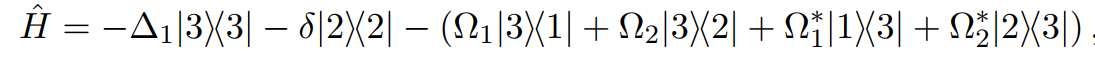
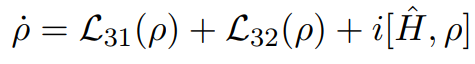
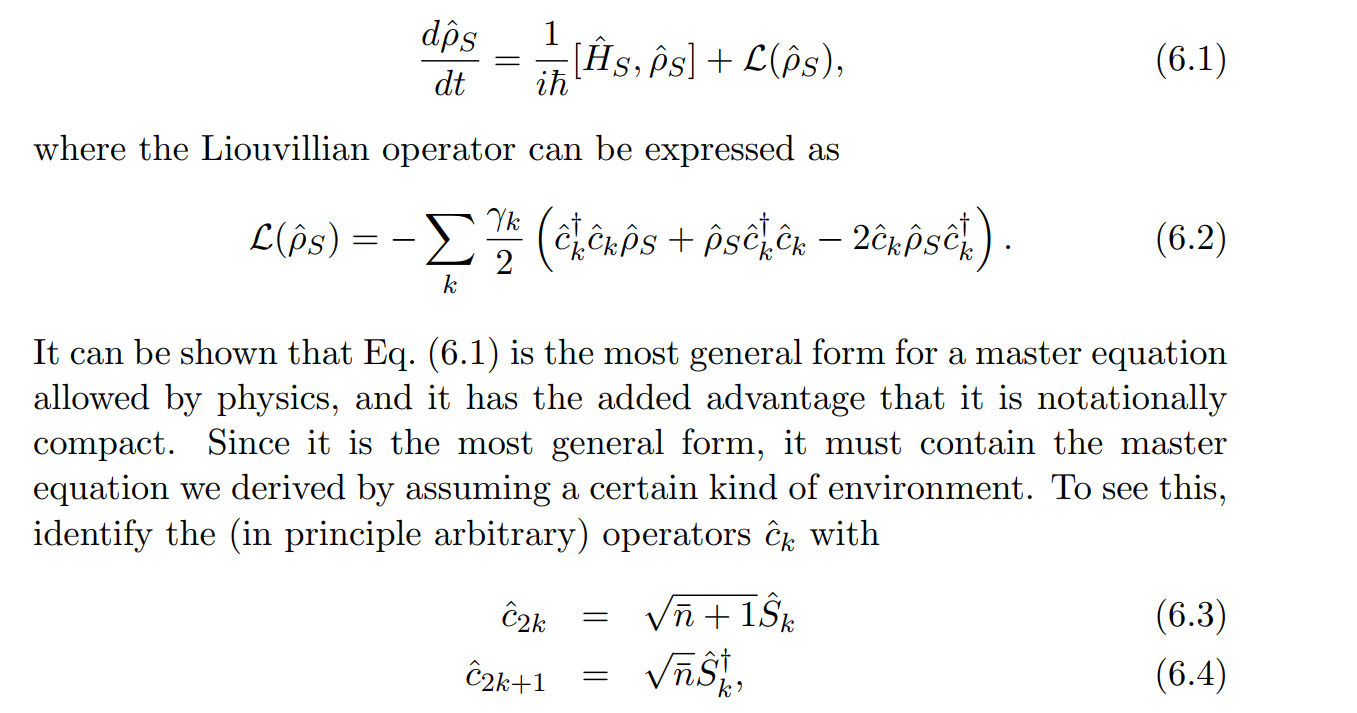

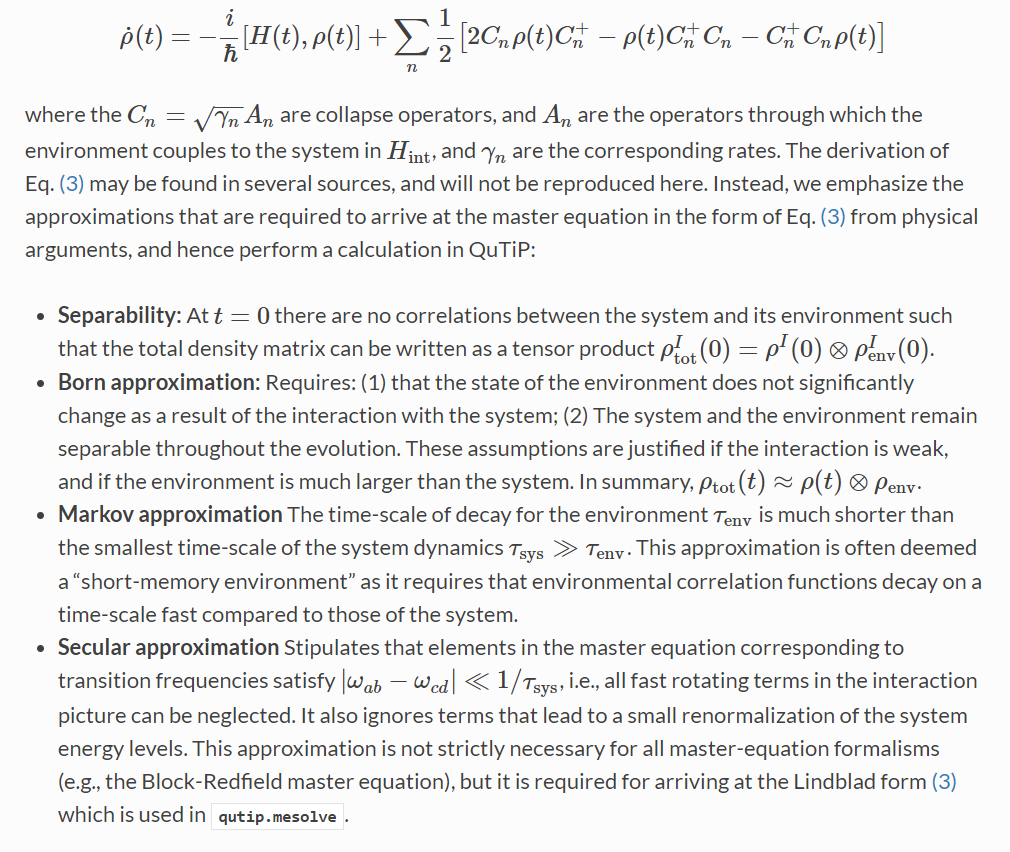
